### Import Libraries

In [1]:
import matplotlib.pyplot as plt
import pydicom
from pydicom.data import get_testdata_files
import os

### Input Directory Names
After downloading the Lung-PET-CT-Dx dataset using the NBIA data retriever, navigate to the directory where the patient labels are stored. It should contain folders such as: 'Lung_Dx-A0001', 'Lung_Dx-G0010'. 

Input the directory as the variable `patient_dir` below. Also input the output directory where you want to store the lung images as `output_dir`. Make sure to use double backslashes `\\`.

In [2]:
patient_dir = ""
os.chdir(patient_dir) #change to directory
output_dir = "" 

### Functions
(1) `dicom_to_png` Takes in the location of a dicom file and uses the PyDicom library to convert to png. \
(2) `find_dicom_directory` Searches through a hierarchy of folders until it finds a folder containing only files. In our situation, the input is the patient folder name e.g. 'Lung_Dx-A0001'. The function searches through the patient sub-directories until it finds the dicom directory. Function looks at only the top files in each directory which is the 2mm files in our case.

In [3]:
def dicom_to_png(dicom_filename,output_dir,patient):
    ds = pydicom.dcmread(dicom_filename) #load DICOM
    plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
    plt.axis("off")
    os.chdir(output_dir)
    plt.savefig(f'{patient}.png',dpi=1000)

def find_file_directory(start_dir):
  current_dir = start_dir
  while True:
    # Get list of entries in the current directory
    entries = os.listdir(current_dir) 
    # Check if any entries are directories
    has_directories = False
    for entry in entries:
      if os.path.isdir(os.path.join(current_dir, entry)) and not os.path.islink(os.path.join(current_dir, entry)):
        has_directories = True
        current_dir = os.path.join(current_dir, entry) # name of the top sub-directory in a given directory.
        break #if a directory is located, break.
    if not has_directories or (not has_directories and all(os.path.isfile(os.path.join(current_dir, f)) for f in entries)):
        return current_dir

### Patient Loop
For each patient, (1) find the DICOM file location, (2) find the central transverse DICOM file and (3) output this as a png.

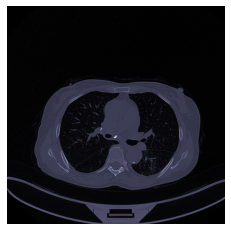

In [4]:
patients = os.listdir(patient_dir) #create list of patient names
patients.pop(0) #delete license file

for patient in patients:
    if os.getcwd() != patient_dir:
        os.chdir(patient_dir) #make sure you are starting in the patient directory
    start_dir = patient
    dicom_dir= find_file_directory(start_dir) #find the location of the dicoms
    dicom_list = os.listdir(dicom_dir)
    central_image = len(dicom_list)//2 # take the central transverse image
    os.chdir(dicom_dir) # change to the dicom directory for the dicom_to_png conversion
    dicom_to_png(dicom_list[central_image],output_dir,patient)